In [77]:
import numpy as np
from matplotlib import pyplot as plt

In [25]:
R = 50
L = 100e-3
C = 80e-6
Is = 0.3

In [3]:
a2 = L*C
a1 = L/R
a0 = 1

In [4]:
a1**2

4e-06

In [5]:
4*a0*a2

3.2000000000000005e-05

In [10]:
alpha = a1/(2*a2)
alpha

124.99999999999999

In [11]:
wd = np.sqrt(4*a0*a2 - a1**2)/(2*a2)
wd

np.float64(330.7189138830738)

In [12]:
-0.3 + 10e-3

-0.29

In [13]:
125*0.29/330

0.10984848484848485

In [8]:
# Underdamped

def xh(t, A1, A2, a0, a1, a2):
    alpha = a1/(2*a2)
    wd = np.sqrt(4*a0*a2 - a1**2)/(2*a2)
    sol = np.exp(-alpha*t)*(A1*np.cos(wd*t)+
                           A2*np.sin(wd*t))
    return sol

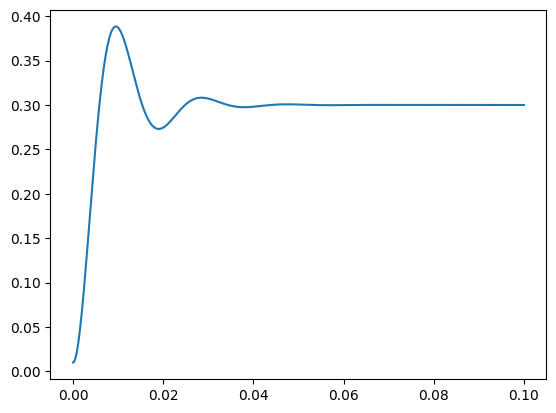

In [14]:
ts = np.linspace(0, 100e-3, 500)
ils = xh(ts, -0.29, -0.11, a0, a1, a2) + 0.3
plt.plot(ts, ils)

# Decibel

* 1 dB = 0.1 B (bel)

* x bel: $\log_{10} x$

In [26]:
import numpy as np
from matplotlib import pyplot as plt

np.log10(0.5)

np.float64(-0.3010299956639812)

* -3 dB Power drops by half.

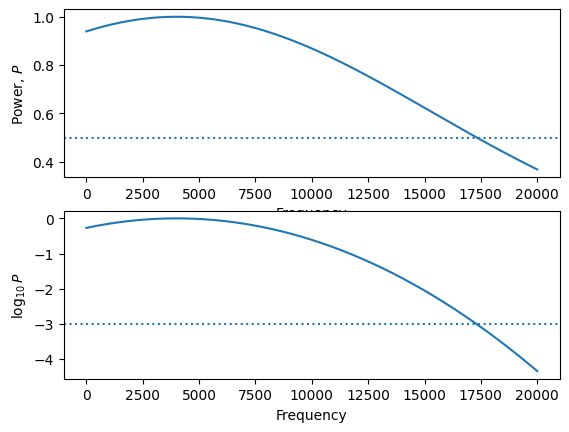

In [44]:
fs = np.linspace(0, 20000, 5000)

f0 = 4000
s = 16000
vs = np.exp( -(fs - f0)**2/s**2 )

plt.subplot(2,1,1)
plt.plot(fs, vs)
plt.xlabel('Frequency')
plt.ylabel('Power, $P$')
plt.axhline(y=0.5, linestyle=':')

plt.subplot(2,1,2)
plt.plot(fs, 10*np.log10(vs))
plt.xlabel('Frequency')
plt.ylabel('$\log_{10 } P$')
plt.axhline(y=-3, linestyle=':')



# Sound


Adapted from ThinkDSP demos for Scipy 2016 talk by Allen Downey (think-dsp.com)

In [78]:
!ls

__pycache__    sound03instru.wav	    sound05melody.wav	sound_ps0.wav
sound01a.wav   sound03violinPhaseShift.wav  sound06both.wav	sound_ps1.wav
sound01h1.wav  sound03violin.wav	    sound06.py
sound01h2.wav  sound03.wav		    sound_demoV3.ipynb
sound03h.wav   sound05chords.wav	    sound_demoV4.ipynb


In [1]:
from sound06 import *

import numpy

%matplotlib inline

In [2]:
Audio

IPython.lib.display.Audio

## First signal

Generate sigal of 440 Hz.

สร้างสัญญาณที่ความถี่ 440 Hz.

In [3]:
# 1. Generate a signal at 440 Hz.
phi = 0 #np.pi/2
a4_sig = Periodic(freq=440, amp=1.0, offset=phi) #func=np.sin


Check out the sine signal: frequency of 440 Hz has period of 2.3 ms.

ดูสัญญาณ sine: 440 Hz จะมีคาบเป็น 2.3 ms.

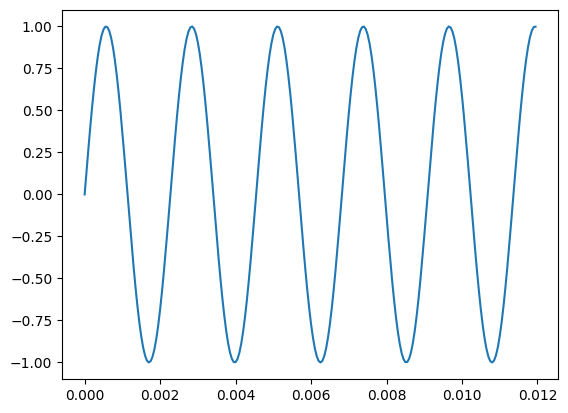

In [4]:
# 2. Visualize waveform
time_s = np.arange(0, 0.012, 0.00005)
ysig = a4_sig.evaluate(time_s)

plt.plot(time_s, ysig)
plt.show()

Produce a sound sigmal.

สร้างสัญญาณเสียง

In [5]:
# 3. Play wave sound
a4_wave = a4_sig.make_wave(duration=1, framerate=11025)
# 3.1 Do raw sound
a4_wave.play('./sound03.wav')

Writing ./sound03.wav


ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
aplay: main:831: audio open error: No such file or directory


In [6]:
!ls

__pycache__    sound03instru.wav	    sound05melody.wav	sound_ps0.wav
sound01a.wav   sound03violinPhaseShift.wav  sound06both.wav	sound_ps1.wav
sound01h1.wav  sound03violin.wav	    sound06.py
sound01h2.wav  sound03.wav		    sound_demoV3.ipynb
sound03h.wav   sound05chords.wav	    sound_demoV4.ipynb


## Sound of sine wave

In [7]:
a4_wave.make_audio()

# Waveform

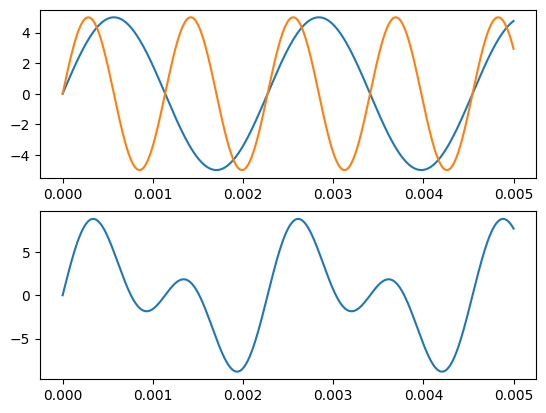

In [8]:
import numpy as np
from matplotlib import pyplot as plt

ts = np.linspace(0, 0.005, 500)
w = 2*np.pi*440
s1 = 5*np.sin(w*ts)

s2 = 5*np.sin(2*w*ts)

plt.subplot(2,1,1)
plt.plot(ts, s1)
plt.plot(ts, s2)

ss = s1 + s2
plt.subplot(2,1,2)
plt.plot(ts, ss)


## Phase shift

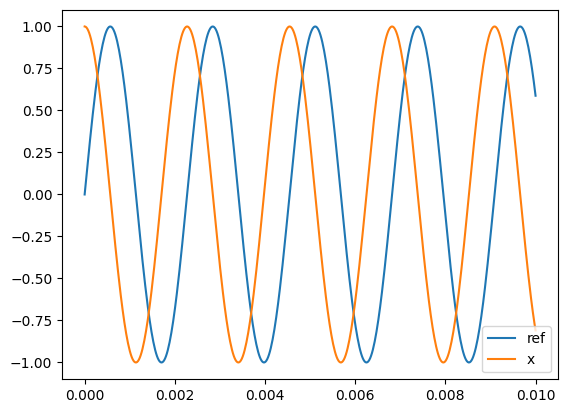

In [9]:
ts = np.linspace(0, 0.01, 500)
f = 440
a = 1
w = 2*np.pi*f
w1 = 2*np.pi*(f + 40)

plt.plot(ts, a*np.sin(w*ts), label='ref')
plt.plot(ts, a*np.sin(w*ts + np.pi/2), label='x')
plt.legend()


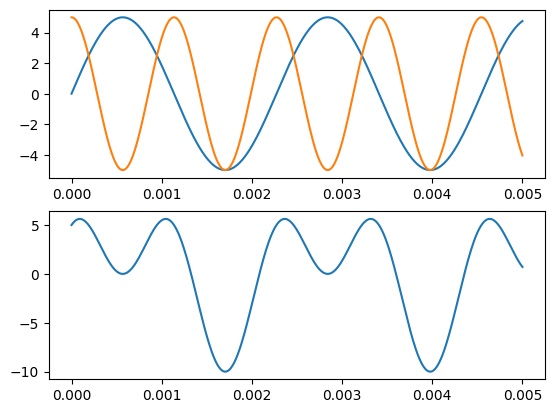

In [10]:
# With phase shift

phase = np.pi/2

ts = np.linspace(0, 0.005, 500)
w = 2*np.pi*440
s1 = 5*np.sin(w*ts)

s2 = 5*np.sin(2*w*ts + phase)

plt.subplot(2,1,1)
plt.plot(ts, s1)
plt.plot(ts, s2)

ss = s1 + s2
plt.subplot(2,1,2)
plt.plot(ts, ss)


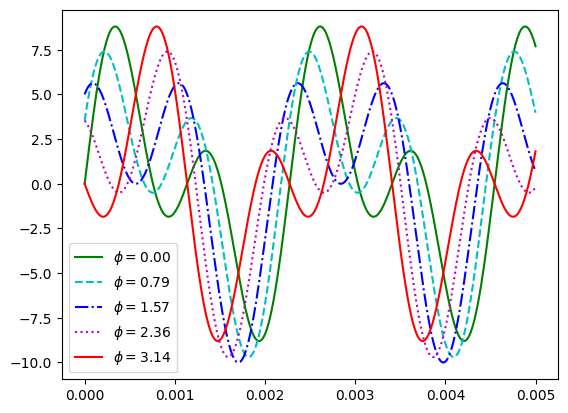

In [11]:
# With phase shift

ts = np.linspace(0, 0.005, 500)
w = 2*np.pi*440
s1 = 5*np.sin(w*ts)

ps = ['g-', 'c--', 'b-.', 'm:', 'r-']
for i, phase in enumerate([0, np.pi/4, np.pi/2, np.pi*3/4, np.pi]):
    s2 = 5*np.sin(2*w*ts + phase)

    ss = s1 + s2
    plt.plot(ts, ss, ps[i], label=f'$\phi = {phase:.2f}$')

plt.legend()

### Hear the phase shift

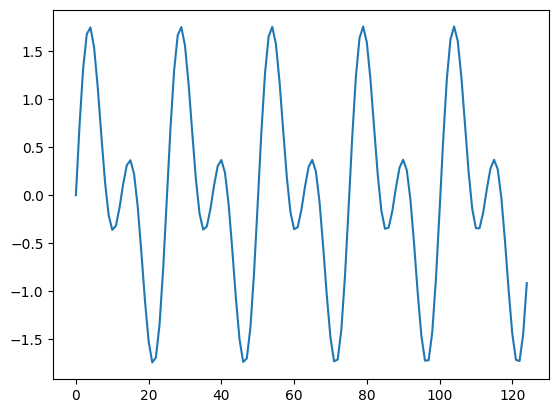

Writing sound_ps0.wav


/home/jupyter-tatpong@kku.ac.th/Y2024/LCA/sound/sound06.py:843: UserWarning: Warning: normalizing before quantizing.
  warnings.warn('Warning: normalizing before quantizing.')
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
aplay: main:831: audio open error: No such file or directory


In [12]:
a4_sig = Periodic(freq=440, amp=1.0, offset=0)
h1_sig = Periodic(freq=880, amp=1.0, offset=0)

a4_wave = a4_sig.make_wave(duration=1, framerate=11025)
h1_wave = h1_sig.make_wave(duration=1, framerate=11025)

h_wave = a4_wave.__add__(h1_wave)

base_freq = 440
plot_duration = 1.0/base_freq * 5 # See 5 periods
ts = int(plot_duration * 11025)
xmarks = np.arange(ts)

plt.plot(xmarks, h_wave.ys[:ts])
plt.show()

h_wave.play('sound_ps0.wav')
h_wave.make_audio()

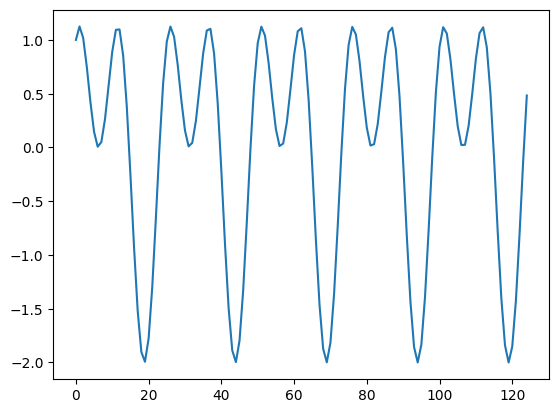

Writing sound_ps1.wav


ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
aplay: main:831: audio open error: No such file or directory


In [13]:
a4_sig = Periodic(freq=440, amp=1.0, offset=0)
h1_sig = Periodic(freq=880, amp=1.0, offset=np.pi/2)

a4_wave = a4_sig.make_wave(duration=1, framerate=11025)
h1_wave = h1_sig.make_wave(duration=1, framerate=11025)

h_wave = a4_wave.__add__(h1_wave)

base_freq = 440
plot_duration = 1.0/base_freq * 5 # See 5 periods
ts = int(plot_duration * 11025)
xmarks = np.arange(ts)

plt.plot(xmarks, h_wave.ys[:ts])
plt.show()

h_wave.play('sound_ps1.wav')
h_wave.make_audio()

## Harmonic

Modify signal: add harmonic.

ตกแต่งสัญญาณ เพิ่มฮาร์โมนิค

In [14]:
h1_sig = Periodic(freq=880, amp=0.7, offset=phi)

h2_sig = Periodic(freq=1320, amp=0.25, offset=phi)

Check out the waveform.

ดูรูปคลื่น

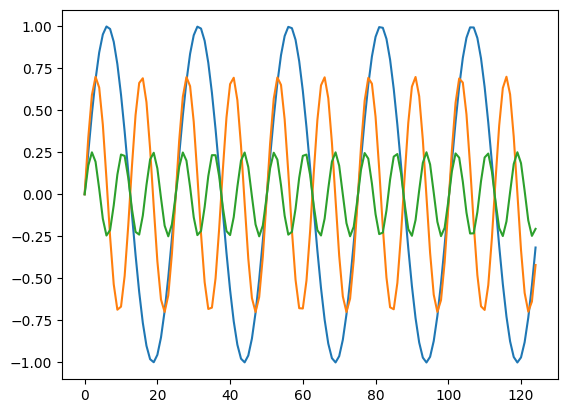

In [15]:
a4_wave = a4_sig.make_wave(duration=0.5, framerate=11025)
h1_wave = h1_sig.make_wave(duration=0.5, framerate=11025)
h2_wave = h2_sig.make_wave(duration=0.5, framerate=11025)

base_freq = 440
plot_duration = 1.0/base_freq * 5 # See 5 periods
ts = int(plot_duration * 11025)
xmarks = np.arange(ts)

plt.plot(xmarks, a4_wave.ys[:ts])
plt.plot(xmarks, h1_wave.ys[:ts])
plt.plot(xmarks, h2_wave.ys[:ts])
plt.show()


Hear each one of them

### Fundamental frequency

In [16]:
a4_wave.play('sound01a.wav')
a4_wave.make_audio()

Writing sound01a.wav


ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
aplay: main:831: audio open error: No such file or directory


In [17]:
h1_wave.play('sound01h1.wav')
h1_wave.make_audio()

Writing sound01h1.wav


ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
aplay: main:831: audio open error: No such file or directory


In [18]:
h2_wave.play('sound01h2.wav')
h2_wave.make_audio()

Writing sound01h2.wav


ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
aplay: main:831: audio open error: No such file or directory


### Three harmonic frequencies

Mix signals and check out waveform.

ผสมสัญญาณ และดูรูปคลื่นรวม

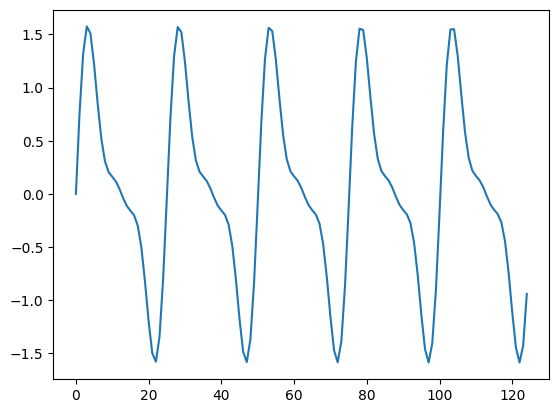

In [19]:
h_wave = a4_wave.__add__(h1_wave)
h_wave = h_wave.__add__(h2_wave)
plt.plot(xmarks, h_wave.ys[:ts])
plt.show()

Listen.

ลองฟังเสียง

In [20]:
h_wave.play('sound03h.wav')
h_wave.make_audio()

Writing sound03h.wav


ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
aplay: main:831: audio open error: No such file or directory


## Violin

Replicate violin sound at key A4 (440 Hz).

ลองเลียนแบบเสียงไวโอลิน ที่ key A4 (440 Hz)

In [30]:
len(violin_wave.ys)

11025

In [39]:
ts*frame_rate

array([  0.        ,   0.25107032,   0.50214064,   0.75321097,
         1.00428129,   1.25535161,   1.50642193,   1.75749226,
         2.00856258,   2.2596329 ,   2.51070322,   2.76177355,
         3.01284387,   3.26391419,   3.51498451,   3.76605484,
         4.01712516,   4.26819548,   4.5192658 ,   4.77033613,
         5.02140645,   5.27247677,   5.52354709,   5.77461742,
         6.02568774,   6.27675806,   6.52782838,   6.77889871,
         7.02996903,   7.28103935,   7.53210967,   7.78318   ,
         8.03425032,   8.28532064,   8.53639096,   8.78746129,
         9.03853161,   9.28960193,   9.54067225,   9.79174258,
        10.0428129 ,  10.29388322,  10.54495354,  10.79602387,
        11.04709419,  11.29816451,  11.54923483,  11.80030516,
        12.05137548,  12.3024458 ,  12.55351612,  12.80458645,
        13.05565677,  13.30672709,  13.55779741,  13.80886774,
        14.05993806,  14.31100838,  14.5620787 ,  14.81314903,
        15.06421935,  15.31528967,  15.56635999,  15.81

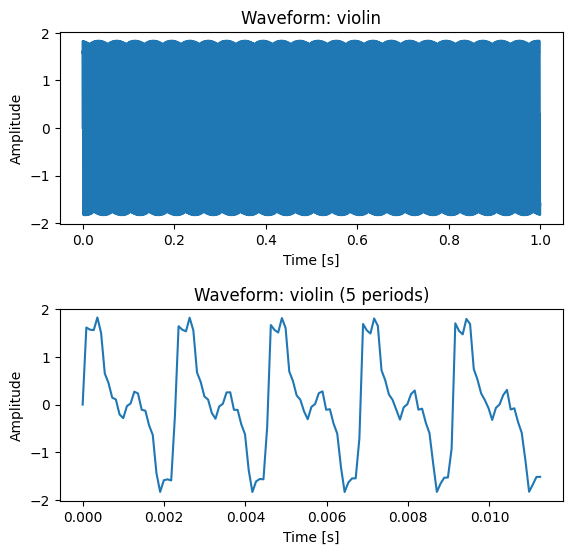

In [50]:
frame_rate = 11025
base_freq = 440

mags_violin = [1.0, 0.286699025, 0.150079537, 0.042909002,
                    0.203797365, 0.229228698, 0.156931925,
                    0.115470898, 0.0, 0.097401803, 0.087653465,
                    0.052331036, 0.052922462, 0.038850593,
                    0.053554676, 0.053697434, 0.022270261,
                    0.013072562, 0.008585879, 0.005771505,
                    0.004343925, 0.002141371, 0.005343231,
                    0.000530244, 0.004711017, 0.009014153]
# from https://stackoverflow.com/questions/10702942/note-synthesis-harmonics-violin-piano-guitar-bass-frequencies-midi

mags = mags_violin

phi = 0
base_sig = Periodic(freq=base_freq, amp=1.0, offset=phi)
violin_wave = base_sig.make_wave(duration=1, framerate=frame_rate)

freq = base_freq + base_freq

for m in mags:
    sig = Periodic(freq=freq, amp=m, offset=phi)
    sig_wav = sig.make_wave(duration=1, framerate=frame_rate)
    violin_wave = violin_wave.__add__(sig_wav)

    freq += base_freq

################################################################

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.tight_layout(rect=[0.1, 0.1, 1, 1.2], h_pad=4, w_pad=4)

Nsamples = len(violin_wave.ys)
duration = Nsamples/frame_rate
ts = np.linspace(0, duration, Nsamples)

plt.subplot(2,1,1)
plt.plot(ts, violin_wave.ys)
plt.title('Waveform: violin')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# To see a waveform clearer, 
# we need to choose how many waveforms (periods) we want to see.
# 1 sec = <frame_rate> samples
# 1 period = 1/base_freq sec.
# N periods = N/base_freq sec. = N/base_freq * frame_rate samples

Nperiods = 5
NS = int(Nperiods/base_freq * frame_rate)

plt.subplot(2,1,2)
plt.plot(ts[:NS], violin_wave.ys[:NS])
plt.title(f'Waveform: violin ({Nperiods} periods)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()



Listen replicated violin sound of key A4.

ฟังเสียงเลียนแบบไวโลลินที่ key A4

In [51]:
violin_wave.play('sound03violin.wav')
violin_wave.make_audio()

Writing sound03violin.wav


ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
aplay: main:831: audio open error: No such file or directory


## New instrument

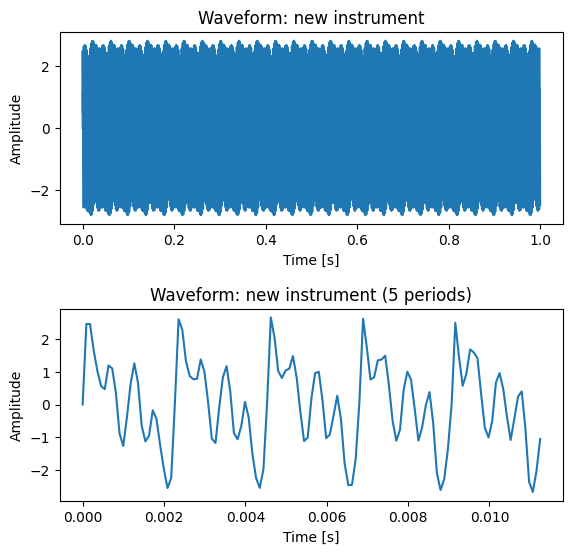

In [59]:
frame_rate = 11025
base_freq = 440
plot_duration = 1.0/base_freq * 5 # See 5 periods
# xmarks = np.arange(0, plot_duration, plot_duration/ts)

# mags_instru = [1.0, 0.75, 0.7, 0.65, 0.60, 0.55]
# mags_instru = [1 for i in range(50)]
# mags_instru = [1 + 0.5*(i % 4) for i in range(100)]
# mags_instru = [0.5 + 0.9**i for i in range(200)]

mags_instru = [np.sin(2*np.pi*i/4) for i in range(20)]

# mags_instru = [1, 3, 1, 3, 0.8, 0.7, 0.5]
# mags_instru = [1, 2, 3, 2, 1]
# mags_instru = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

mags = mags_instru

phi = 0
base_sig = Periodic(freq=base_freq, amp=0.5, offset=phi)
instru_wave = base_sig.make_wave(duration=0.3, framerate=frame_rate)

freq = base_freq + base_freq

for m in mags:
    sig = Periodic(freq=freq, amp=m, offset=phi)
    sig_wav = sig.make_wave(duration=1, framerate=frame_rate)
    instru_wave = violin_wave.__add__(sig_wav)

    freq += base_freq

################################################################

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.tight_layout(rect=[0.1, 0.1, 1, 1.2], h_pad=4, w_pad=4)

Nsamples = len(instru_wave.ys)
duration = Nsamples/frame_rate
ts = np.linspace(0, duration, Nsamples)

plt.subplot(2,1,1)
plt.plot(ts, instru_wave.ys)
plt.title('Waveform: new instrument')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# To see a waveform clearer, 
# we need to choose how many waveforms (periods) we want to see.
# 1 sec = <frame_rate> samples
# 1 period = 1/base_freq sec.
# N periods = N/base_freq sec. = N/base_freq * frame_rate samples

Nperiods = 5
NS = int(Nperiods/base_freq * frame_rate)

plt.subplot(2,1,2)
plt.plot(ts[:NS], instru_wave.ys[:NS])
plt.title(f'Waveform: new instrument ({Nperiods} periods)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

In [60]:
instru_wave.play('sound03instru.wav')
instru_wave.make_audio()

Writing sound03instru.wav


ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
aplay: main:831: audio open error: No such file or directory


# Frequencies

ลองเปลี่ยนความถี่

## Sequence of sounds

ฟังลำดับเสียง: เปลี่ยนความถี่และเปลี่ยนความดัง

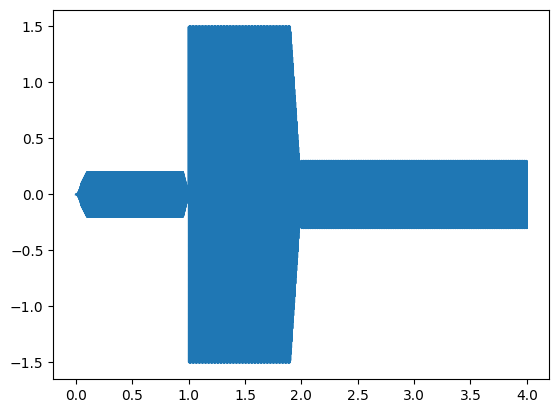

In [61]:
# src: https://pages.mtu.edu/~suits/notefreqs.html
music_notes = {'C4': 261.63, 'C#4': 277.18, 'D4': 293.66,
               'D#4': 311.13, 'E4': 329.63, 'F4': 349.23,
               'F#4': 369.99, 'G4': 392.00, 'G#4': 415.30,
               'A4': 440.00, 'A#4': 466.16, 'B4': 493.88,
               'C5': 523.25,'A3':220}

# Play E, C, G
melody0 = [ ['E4', 0.2, 1], ['C4', 1.5, 1] , ['G4', 0.3, 2]]

# Donut 68
melody1 = [ ['E4', 0.5, 1], ['G4', 1, 1] , 
          ['E4', 0.5, 0.2] , ['D4', 0.5, 0.2] , 
          ['C4', 0.5, 0.2] , ['D4', 0.5, 0.2] , 
           ['E4', 0.5, 0.2],['A3', 0.5, 0.2]]

melody2 = [ ['G4', 0.5, 0.5], ['G4', 1, 0.5] , 
          ['G4', 0.5, 1] , ['G4', 0.5, 0.5] , 
          ['E4', 0.5, 0.5] , ['D4', 0.5, 0.5] , 
           ['E4', 0.5, 0.5],['G4', 0.5, 0.5],['C4', 0.5, 0.5]]

melody3 = [
    ['C4', 0.5, 0.2], ['C4', 0.5, 0.2], ['C4', 0.5, 0.2], ['D4', 0.5, 0.2], 
    ['E4', 1, 0.5], ['C4', 0.5, 0.2], ['D4', 0.5, 0.2], ['E4', 1, 0.5], 
    ['G4', 0.5, 0.2], ['E4', 0.5, 0.2], ['D4', 0.5, 0.2], ['C4', 1, 0.5],
    ['C4', 0.5, 0.2], ['C4', 0.5, 0.2], ['C4', 0.5, 0.2], ['D4', 0.5, 0.2], 
    ['E4', 1, 0.5], ['C4', 0.5, 0.2], ['D4', 0.5, 0.2], ['E4', 1, 0.5], 
    ['G4', 0.5, 0.2], ['E4', 0.5, 0.2], ['D4', 0.5, 0.2], ['C4', 1, 1]
]

melody = melody0

n_sig = Periodic(freq=music_notes[melody[0][0]], amp=melody[0][1])
n_wav = n_sig.make_wave(duration=melody[0][2], framerate=frame_rate)

n_len = melody[0][2] # melody duration

for n in melody[1:]:
    n_sig = Periodic(freq=music_notes[n[0]], amp=n[1])
    new_wav = n_sig.make_wave(duration=n[2], framerate=frame_rate)

    n_wav.apodize()
    n_wav = n_wav.__or__(new_wav)
    n_len += n[2]

# Visualize the entire range
xmarks = np.arange(0, n_len, n_len/len(n_wav.ys))
plt.plot(xmarks, n_wav.ys)
plt.show()


In [62]:
!ls

__pycache__    sound03instru.wav	    sound05melody.wav	sound_ps0.wav
sound01a.wav   sound03violinPhaseShift.wav  sound06both.wav	sound_ps1.wav
sound01h1.wav  sound03violin.wav	    sound06.py
sound01h2.wav  sound03.wav		    sound_demoV3.ipynb
sound03h.wav   sound05chords.wav	    sound_demoV4.ipynb


In [63]:
n_wav.play('./sound05melody.wav')
n_wav.make_audio()

Writing ./sound05melody.wav


ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
aplay: main:831: audio open error: No such file or directory


# Chords

Play multiple frequencies (but the frequencies are not the multiple of the fundamental frequency).

เล่นหลาย ๆ ความถี่พร้อม ๆ กัน แต่ความถี่ใส่ไม่ได้เป็นเท่าตัวของ fundamental frequency

The harmonic appears as chords.

เกิดเป็น harmonic ในลักษณะของ chord

## Chords alone

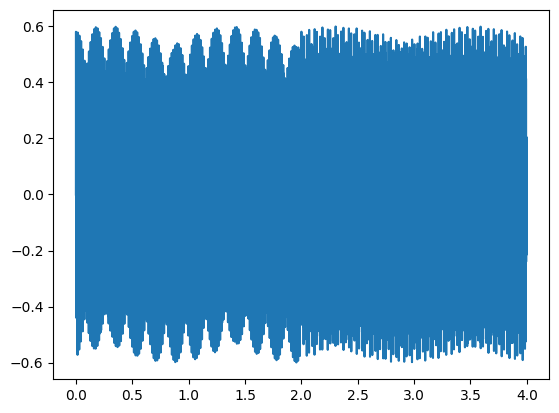

In [64]:
chords = [ ['C4', 'E4', 'G4', 0.2, 2], # C
           ['G4', 'B4', 'F4', 0.2, 2]] # G

c_sig = Periodic(freq=music_notes[chords[0][0]], amp=chords[0][3])
c1_wav = c_sig.make_wave(duration=chords[0][4], framerate=frame_rate)

c_sig = Periodic(freq=music_notes[chords[0][1]], amp=chords[0][3])
new_wav = c_sig.make_wave(duration=chords[0][4], framerate=frame_rate)
c1_wav = c1_wav.__add__(new_wav)

c_sig = Periodic(freq=music_notes[chords[0][2]], amp=chords[0][3])
new_wav = c_sig.make_wave(duration=chords[0][4], framerate=frame_rate)
c1_wav = c1_wav.__add__(new_wav)

c_sig = Periodic(freq=music_notes[chords[1][0]], amp=chords[1][3])
c2_wav = c_sig.make_wave(duration=chords[1][4], framerate=frame_rate)

c_sig = Periodic(freq=music_notes[chords[1][1]], amp=chords[1][3])
new_wav = c_sig.make_wave(duration=chords[1][4], framerate=frame_rate)
c2_wav = c2_wav.__add__(new_wav)

c_sig = Periodic(freq=music_notes[chords[1][2]], amp=chords[1][3])
new_wav = c_sig.make_wave(duration=chords[1][4], framerate=frame_rate)
c2_wav = c2_wav.__add__(new_wav)

c_wav = c1_wav.__or__(c2_wav)

c_len = 4

# Visualize the entire range
xmarks = np.arange(0, c_len, c_len/len(c_wav.ys))
plt.plot(xmarks, c_wav.ys)
plt.show()

ฟังเสียงที่ได้

In [65]:
c_wav.play('./sound05chords.wav')
c_wav.make_audio()

Writing ./sound05chords.wav


ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
aplay: main:831: audio open error: No such file or directory


## Chords + Melody

ผสม melodies กับ chords

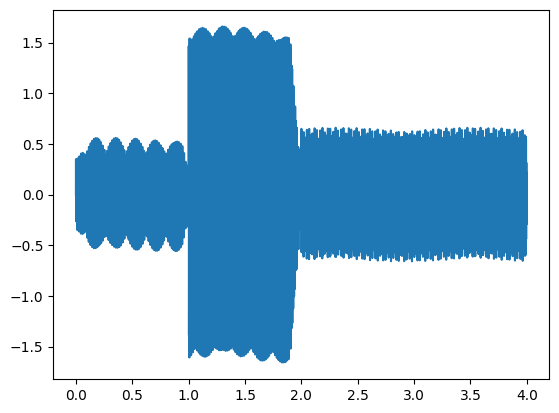

In [66]:
both_wav = n_wav.__add__(c_wav, [1, 0.6])
plt.plot(xmarks, both_wav.ys)
plt.show()

In [67]:
both_wav.play('./sound06both.wav')
both_wav.make_audio()

Writing ./sound06both.wav


ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
aplay: main:831: audio open error: No such file or directory


# Fourier series

$f(x) = \sum_{n=-\infty}^{\infty} c_n e^{2 n \pi i x}$

where
* $i = \sqrt{-1}$
* $n \in \{ \ldots, -3, -2, -1, 0, 1, 2, 3, \ldots \}$
* $c_0 = \int_0^1 f(x) dx $
* $c_k = \int_0^1 f(x) e^{-2 k \pi i x} dx $

Note

$e^{i \theta} = \cos(\theta) + i \sin(\theta)$

## ```fourier_approx```

In [174]:
def fourier_approx(x, N, cn):
    '''
    Approximate fourier series
    f(x) = \sum_{n=-N}^N c_n e^{2 n \pi i x}

    * cn must have 2*N + 1 elements
    * x: np.array shape (D,)
    '''

    x = x.reshape((-1,1))                            # K x 1
    nvec = np.arange(-N, N+1).reshape((-1,1))        # M x 1
    cn = cn.reshape((-1,1))                          # M x 1
    bases = np.exp(2*np.pi * 1j * np.dot(nvec, x.T)) # M x K

    f = np.dot(bases.T, cn)                          # K x 1

    return f.reshape((-1,))

In [175]:
xs = np.linspace(0, 2*np.pi, 10)
cn = np.array([0, 0, 0, 0, 1, 1, 0.6, 0.3, 0.1])
N = int( (len(cn) - 1)/2 )

xf = fourier_approx(xs, N, cn)
print('xf=', xf)

xf= [3.        +0.j         0.47800978-0.51216486j 0.38992323+0.25505992j
 1.92037141+1.47816385j 0.58026616-0.97378368j 0.39948813+0.0176788j
 0.67304667+1.12282292j 1.59252305-1.52907049j 0.38415725-0.19883446j
 0.48726463+0.56618745j]


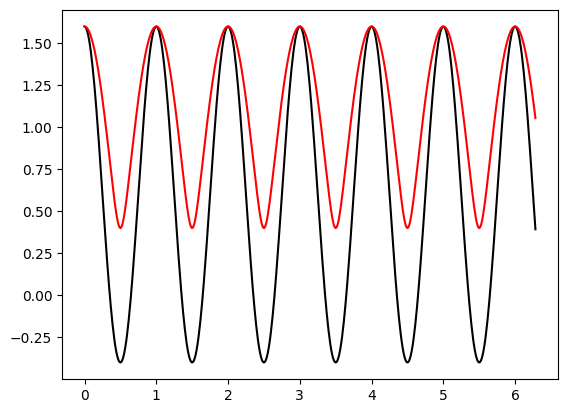

In [176]:
xs = np.linspace(0, 2*np.pi, 500)
# cn = np.array([0, 0, 0, 0, 1, 1, 0.6, 0.3, 0.1])
cn = np.array([0, 0.6, 1])

N = int( (len(cn) - 1)/2 )

xf = fourier_approx(xs, N, cn)

plt.plot(xs, xf.real, 'k')
plt.plot(xs, np.absolute(xf), 'r')

## Determine coefficients

$c_k = \int_0^1 f(x) e^{-2 k \pi i x} dx$

Approximate with

$c_k = \sum_{x=0}^1 f(x) e^{-2 k \pi x} \Delta x$

for $k = -N, \ldots, -1, 0, 1, 2, \ldots, N$.

## ```fourier_coeff```

In [177]:
def fourier_coeff(f, N, dx=0.01):
    '''
    Approximate fourier coefficients
    f: function with vectorization capability:
       * taking (K x 1) and returning (K x 1)

    return cn: np.array shape (2*N+1,)
    '''
    xs = np.linspace(0, 1, int(1/dx) + 1).reshape((-1,1))   # K x 1
    nvec = np.arange(-N, N+1).reshape((-1,1))               # M x 1

    fx = f(xs).reshape((-1,1))                              # K x 1

    Sel = np.exp(-2*np.pi* 1j * np.dot(nvec, xs.T)) * dx    # M x K

    cn = np.dot(Sel, fx)

    return cn.reshape((-1,))

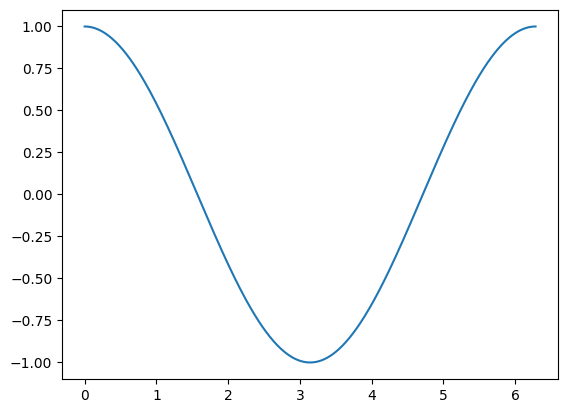

In [178]:
f1 = lambda t: np.cos(t)

xs = np.linspace(0, 2*np.pi, 500)
plt.plot(xs, f1(xs))

In [179]:
cn = fourier_coeff(f1, 5, dx=0.001)
print(cn)

[-8.33720637e-05+0.01464627j -5.64200647e-04+0.01831883j
 -1.60490432e-03+0.02445583j -4.59255552e-03+0.03681423j
 -2.10985673e-02+0.07506433j  8.42241066e-01+0.j
 -2.10985673e-02-0.07506433j -4.59255552e-03-0.03681423j
 -1.60490432e-03-0.02445583j -5.64200647e-04-0.01831883j
 -8.33720637e-05-0.01464627j]


## Fourier approximation of an arbitrary function

[5.00000154e-06 6.49605581e-03 5.00000142e-06 6.77248366e-03
 5.00000131e-06]


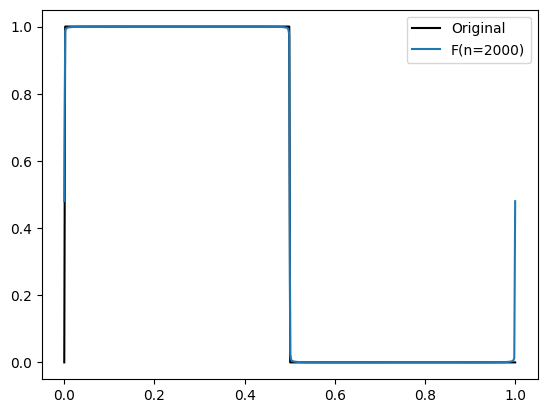

In [189]:
N = 50
dx = 0.00001
# f1 = lambda x: np.sin(2*np.pi*x)
# f1 = lambda x: np.sin(2*np.pi*x) + 1.5*np.sin(np.pi*x)
f1 = lambda x: (np.sin(2*np.pi*x) > 0)*1
# f1 = lambda x: ((np.sin(2*np.pi*x) > 0)*1 - 0.5)*2*x
# f1 = lambda x: 2*x+1

cn = fourier_coeff(f1, N, dx)
print(np.abs(cn[:5]))

xs = np.linspace(0, 1, 500)
xf = fourier_approx(xs, N, cn)
# print('xf=', xf)

plt.plot(xs, f1(xs), 'k-', label='Original')
# plt.plot(xs, xf.real, 'r--', label=f'F(n={N})')

# for N in [1, 2, 3, 10]:
for N in [2000]:    
    cn = fourier_coeff(f1, N, dx)
    xf = fourier_approx(xs, N, cn)
    # plt.plot(xs, xf.real, ':', label=f'F(n={N})')
    plt.plot(xs, xf.real, label=f'F(n={N})')
    
    plt.legend()


## Fourier series approximates periodic signal.

If $x$ goes beyond 1, we will see periodic nature of the Fourier approximation.

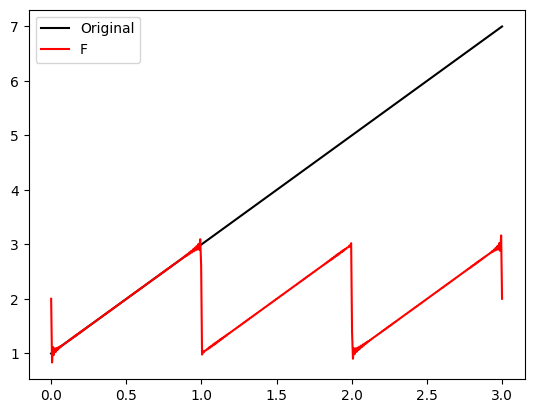

In [190]:
N = 80
dx = 0.00001
f1 = lambda x: 2*x+1
# f1 = lambda x: x**2
# f1 = lambda x: x**3
# f1 = lambda x: np.sin(2*np.pi*x)


cn = fourier_coeff(f1, N, dx)

xs = np.linspace(0, 3, 500)
xf = fourier_approx(xs, N, cn)
# print('xf=', xf)

plt.plot(xs, f1(xs), 'k', label='Original')
plt.plot(xs, xf.real, 'r', label='F')
# plt.plot(xs, np.absolute(xf), 'b:')

plt.legend()

# Spectrogram

In [95]:
# Example from https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [96]:
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

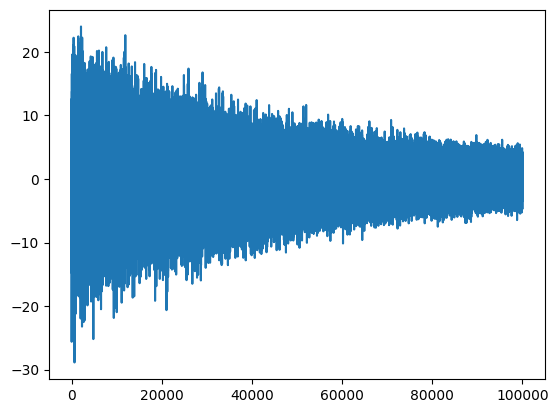

In [97]:
plt.plot(x)

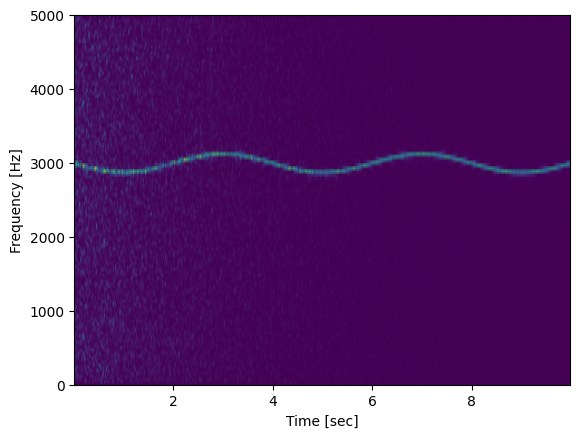

In [98]:
f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

## Spectrogram of The Saved Wave

In [99]:
from scipy.io import wavfile
fs, data = wavfile.read('./sound05chords.wav')

In [101]:
c_wav.make_audio()

In [102]:
fs

11025

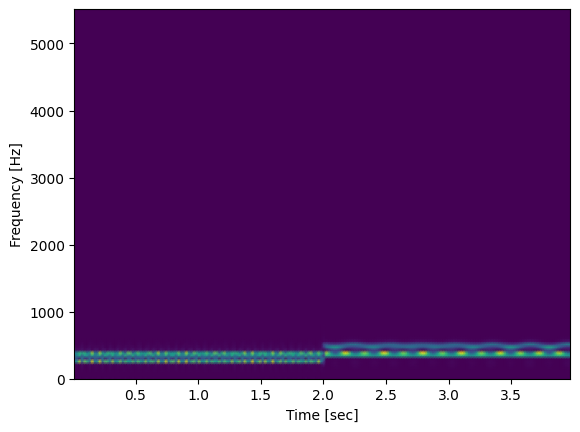

In [103]:
f, t, Sxx = signal.spectrogram(data, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

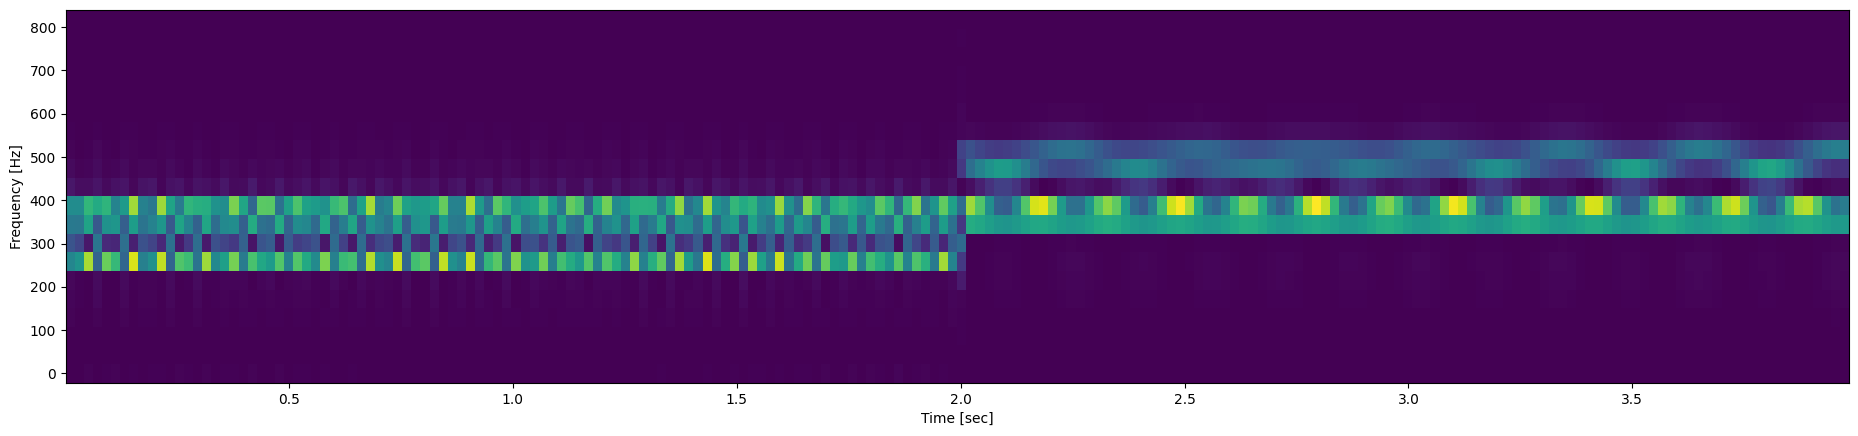

In [104]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.tight_layout(rect=[0.1, 0.1, 3, 1], h_pad=3, w_pad=2)

Ntb, Nte = 0, 196
Nfb, Nfe = 0, 20
# plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.pcolormesh(t[Ntb:Nte], f[Nfb:Nfe], Sxx[Nfb:Nfe,Ntb:Nte])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

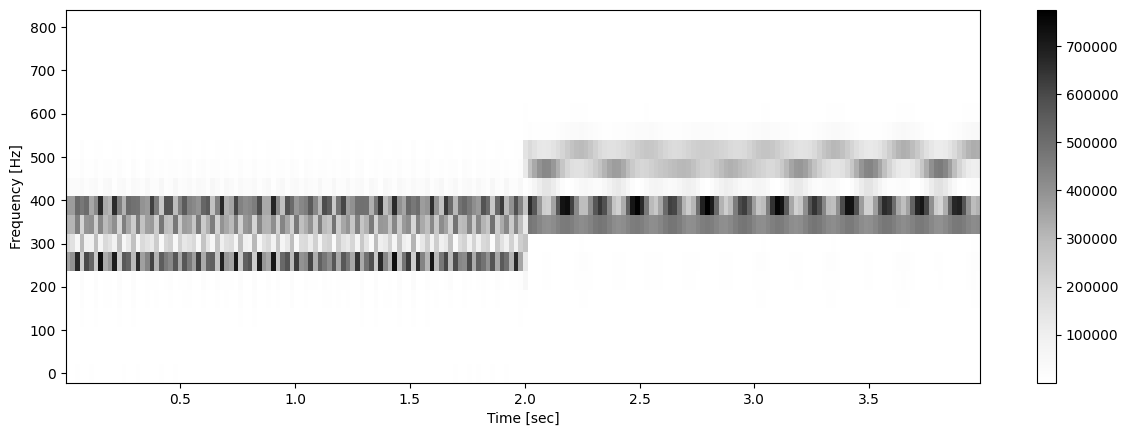

In [105]:
f, t, Sxx = signal.spectrogram(data, fs)
Ntb, Nte = 0, 196
Nfb, Nfe = 0, 20

cmap = plt.get_cmap('Greys')

# fig=plt.figure()
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.tight_layout(rect=[0.1, 0.1, 2, 1], h_pad=3, w_pad=2)
pc=axes.pcolormesh(t, f[Nfb:Nfe], Sxx[Nfb:Nfe,:], cmap=cmap)
fig.colorbar(pc)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# plt.yticks(x, labels, rotation='vertical')
plt.show()

## Viewable chords

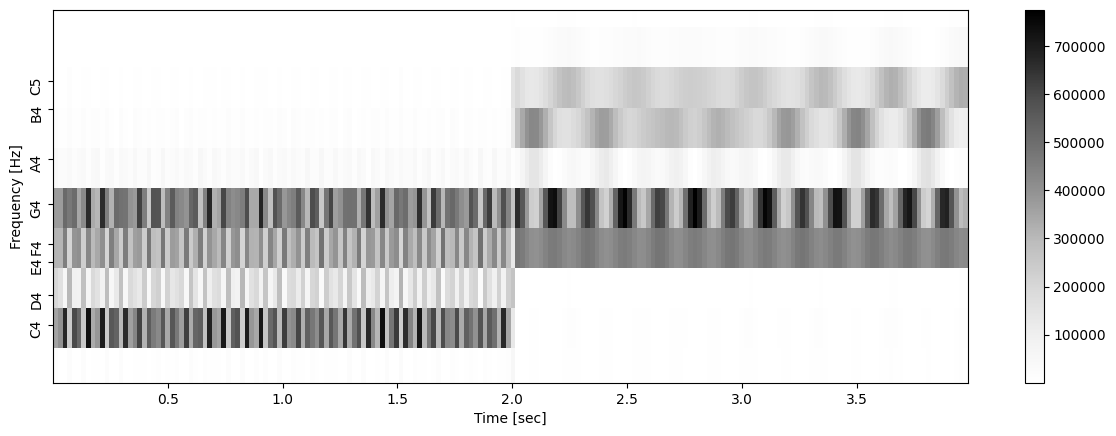

In [106]:
fs, data = wavfile.read('./sound05chords.wav')
f, t, Sxx = signal.spectrogram(data, fs)
Ntb, Nte = 0, 196
Nfb, Nfe = 0, 20

cmap = plt.get_cmap('Greys')

# fig=plt.figure()
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.tight_layout(rect=[0.1, 0.1, 2, 1], h_pad=3, w_pad=2)
pc=axes.pcolormesh(t, f[Nfb:Nfe], Sxx[Nfb:Nfe,:], cmap=cmap)
fig.colorbar(pc)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# plt.yticks(x, labels, rotation='vertical')


# From https://pages.mtu.edu/~suits/notefreqs.html
notes = ['C0', 'C1', 'C2', 'C3', 'C4',
         'D4', 'E4', 'F4', 'G4', 'A4', 'B4',
         'C5', 'C6']
freqs = [16.35, 32.70, 65.41, 130.81, 261.63,
         293.66, 329.63, 349.23, 392.0, 440, 493.88,
         523.25, 1046.50]
plt.yticks(freqs, notes, rotation='vertical')
plt.ylim((200, 600))

plt.show()

## Change parameters

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html#scipy.signal.spectrogram

* ```window```: str or tuple or array_like, optional
Desired window to use. If window is a string or tuple, it is passed to get_window to generate the window values, which are DFT-even by default. See get_window for a list of windows and required parameters. If window is array_like it will be used directly as the window and its length must be nperseg. Defaults to a Tukey window with shape parameter of 0.25.

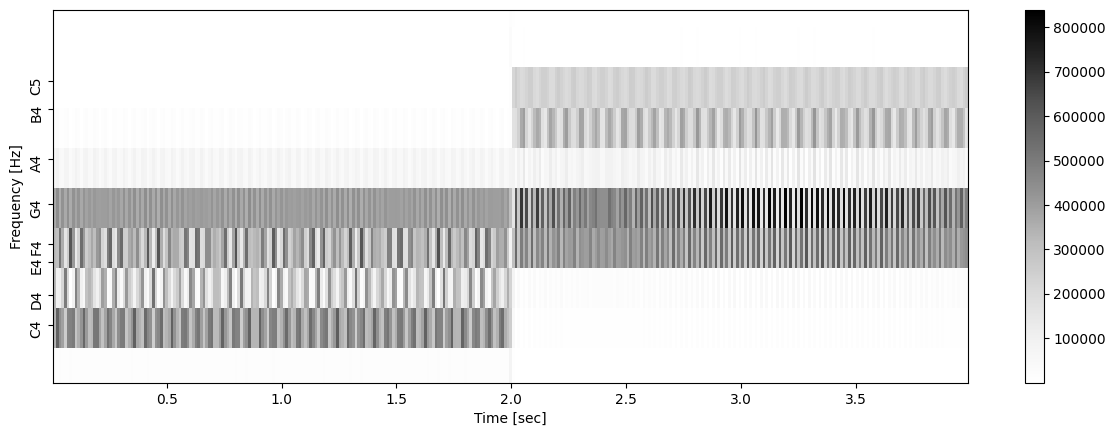

In [108]:
f, t, Sxx = signal.spectrogram(data, fs,
                               window='tukey',
                               nperseg=256,
                               noverlap=128)


Ntb, Nte = 0, 196
Nfb, Nfe = 0, 20

cmap = plt.get_cmap('Greys')

# fig=plt.figure()
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.tight_layout(rect=[0.1, 0.1, 2, 1], h_pad=3, w_pad=2)
pc=axes.pcolormesh(t, f[Nfb:Nfe], Sxx[Nfb:Nfe,:], cmap=cmap)
fig.colorbar(pc)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# plt.yticks(x, labels, rotation='vertical')


plt.yticks(freqs, notes, rotation='vertical')
plt.ylim((200, 600))

plt.show()

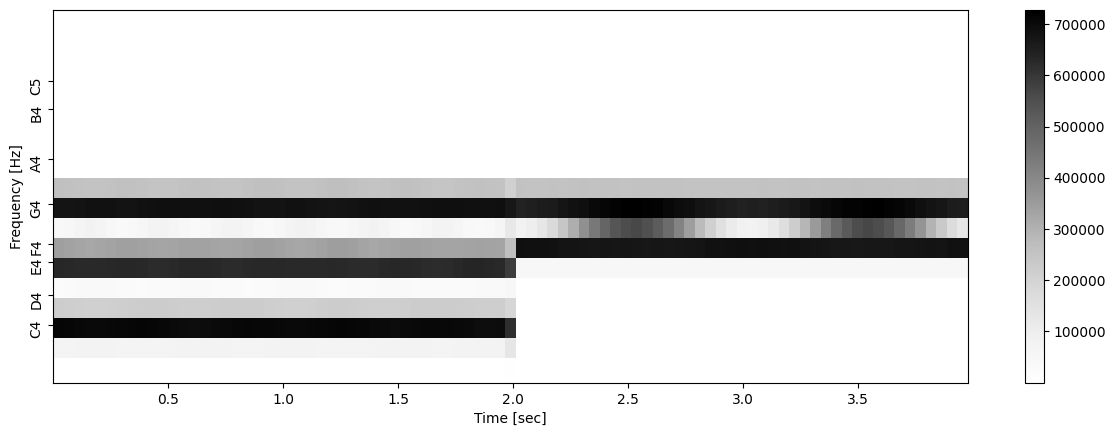

In [109]:
f, t, Sxx = signal.spectrogram(data, fs,
                               window='hamming',
                               nperseg=512,
                               noverlap=8)

Ntb, Nte = 0, 196
Nfb, Nfe = 0, 20

cmap = plt.get_cmap('Greys')

# fig=plt.figure()
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.tight_layout(rect=[0.1, 0.1, 2, 1], h_pad=3, w_pad=2)
pc=axes.pcolormesh(t, f[Nfb:Nfe], Sxx[Nfb:Nfe,:], cmap=cmap)
fig.colorbar(pc)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# plt.yticks(x, labels, rotation='vertical')


plt.yticks(freqs, notes, rotation='vertical')
plt.ylim((200, 600))

plt.show()

## Viewable chords + Melody

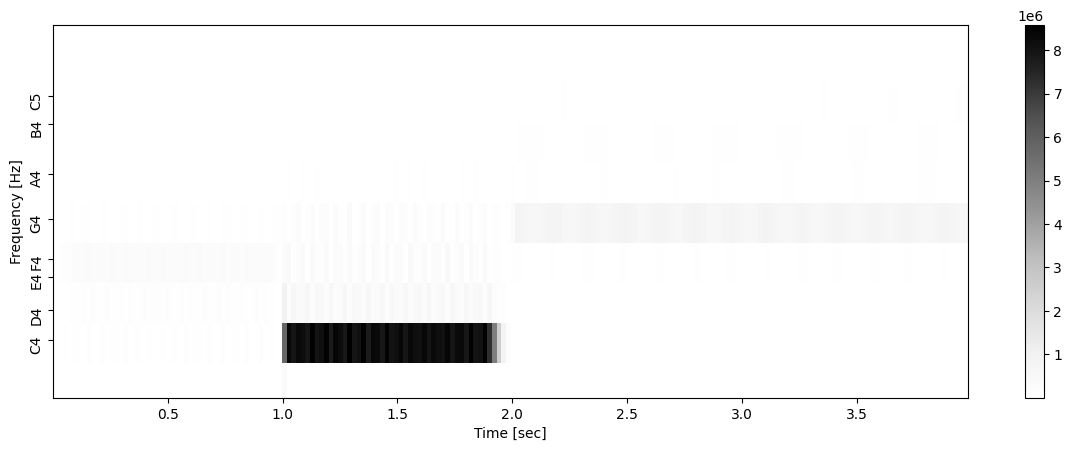

In [111]:
fs, data = wavfile.read('./sound06both.wav')
f, t, Sxx = signal.spectrogram(data, fs)
Ntb, Nte = 0, 196
Nfb, Nfe = 0, 20

cmap = plt.get_cmap('Greys')

# fig=plt.figure()
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.tight_layout(rect=[0.1, 0.1, 2, 1], h_pad=3, w_pad=2)
pc=axes.pcolormesh(t, f[Nfb:Nfe], Sxx[Nfb:Nfe,:], cmap=cmap)
fig.colorbar(pc)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# plt.yticks(x, labels, rotation='vertical')


# From https://pages.mtu.edu/~suits/notefreqs.html
notes = ['C0', 'C1', 'C2', 'C3', 'C4',
         'D4', 'E4', 'F4', 'G4', 'A4', 'B4',
         'C5', 'C6']
freqs = [16.35, 32.70, 65.41, 130.81, 261.63,
         293.66, 329.63, 349.23, 392.0, 440, 493.88,
         523.25, 1046.50]
plt.yticks(freqs, notes, rotation='vertical')
plt.ylim((200, 600))

plt.show()

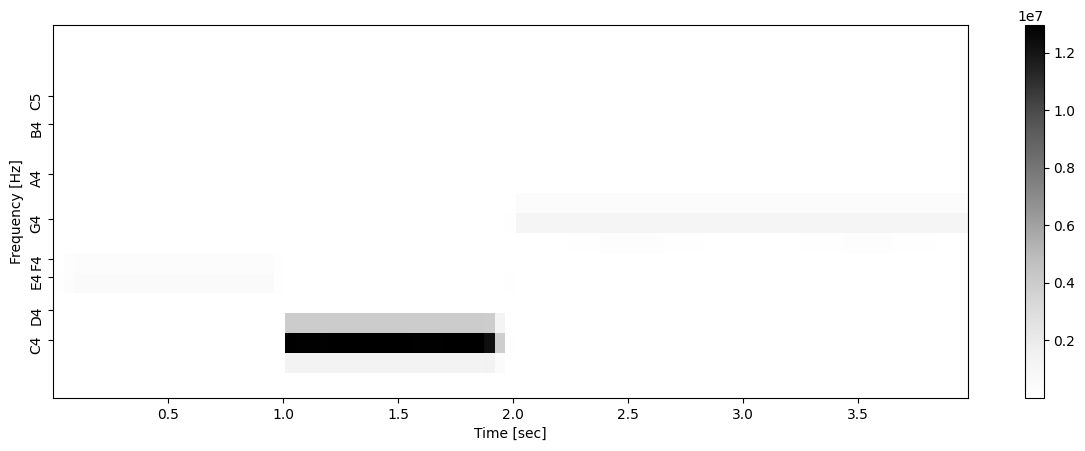

In [112]:
fs, data = wavfile.read('./sound06both.wav')

f, t, Sxx = signal.spectrogram(data, fs,
                               window='hamming',
                               nperseg=512,
                               noverlap=8)

Ntb, Nte = 0, 196
Nfb, Nfe = 0, 20

cmap = plt.get_cmap('Greys')

# fig=plt.figure()
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.tight_layout(rect=[0.1, 0.1, 2, 1], h_pad=3, w_pad=2)
pc=axes.pcolormesh(t, f[Nfb:Nfe], Sxx[Nfb:Nfe,:], cmap=cmap)
fig.colorbar(pc)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# plt.yticks(x, labels, rotation='vertical')


# From https://pages.mtu.edu/~suits/notefreqs.html
notes = ['C0', 'C1', 'C2', 'C3', 'C4',
         'D4', 'E4', 'F4', 'G4', 'A4', 'B4',
         'C5', 'C6']
freqs = [16.35, 32.70, 65.41, 130.81, 261.63,
         293.66, 329.63, 349.23, 392.0, 440, 493.88,
         523.25, 1046.50]
plt.yticks(freqs, notes, rotation='vertical')
plt.ylim((200, 600))

plt.show()

# Taylor series

In [2]:
from sympy import symbols
from sympy import cos, sin
from sympy import diff, Function, pi, exp, oo


In [4]:
def factorial(n):
  f = 1
  for i in range(1, n+1):
    f *= i

  return f

In [50]:
for n in [0, 1, 2, 3, 4]:
    print(n, ':', factorial(n))

0 : 1
1 : 1
2 : 2
3 : 6
4 : 24


In [3]:
f = cos
x = symbols('x')
f(0) + f(x).diff(x)

1

In [5]:
f = cos
f(0)

1

In [7]:
x = symbols('x')
f(x).diff(x)

-sin(x)

In [11]:
f(x).diff(x).evalf(subs={x:0})

0

In [8]:
f(x).diff(x,2)

-cos(x)

In [12]:
f(x).diff(x,2).evalf(subs={x:0})

-1.00000000000000

In [9]:
f(x).diff(x,3)

sin(x)

In [14]:
for i in [0, 1, 2, 3, 4]:
    print(f(x).diff(x,i))

cos(x)
-sin(x)
-cos(x)
sin(x)
cos(x)


https://en.wikipedia.org/wiki/Taylor_series

> The Taylor series of a real or complex-valued function $f(x)$, that is infinitely differentiable at a real or complex number $a$, is the power series
> 
> $$f(x) = f(a) + \frac{f'(a)}{1!}(x - a) + \frac{f''(a)}{2!}(x - a)^2 + \cdots = \sum_{n=0}^\infty \frac{f^{(n)} (a)}{n!} (x-a)^n$$
>
> The Maclaurin series:
>
> $$f(x) = f(0) + \frac{f'(0)}{1!} x + \frac{f''(0)}{2!}x^2 + \cdots = \sum_{n=0}^\infty \frac{f^{(n)} (0)}{n!} (x)^n$$

In [63]:
from sympy import symbols, diff

def taylor_approx(fx, K, x0=0):
    '''
    fx: function, e.g., sin(x)
    K: a number of truncated terms, f(x) ~= f(x0) + f'(x0)/(xp-x0) + ... + f.diff(x,K)/K! (xp - x0)^K
    xp: approximation point
    x0: anchor point; default x0=0    
    '''

    x = symbols('x')
    
    terms = fx.evalf(subs={x:x0})
    for k in range(1, K+1):
        term = fx.diff(x,k).evalf(subs={x:x0})/factorial(k) * (x - x0)**k
        # print(k, ':', term)
        terms += term

    return terms

In [71]:
from sympy import symbols, sin

x = symbols('x')
ftarget = sin(x)

fapprox = taylor_approx(ftarget, 5, x0=0)
fapprox

0.00833333333333333*x**5 - 0.166666666666667*x**3 + 1.0*x

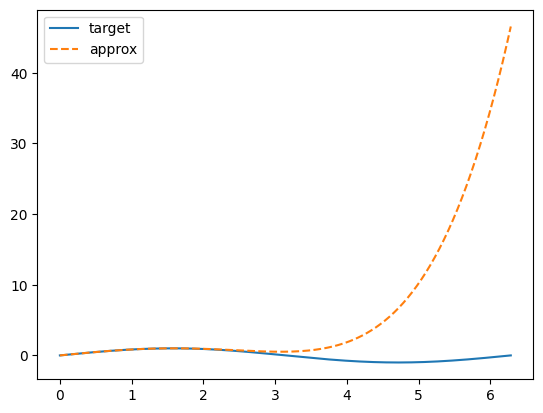

In [72]:
xs = np.linspace(0, 2*np.pi, 500)
ys = [ftarget.evalf(subs={x:xi}) for xi in xs]

yapprxs = [fapprox.evalf(subs={x:xi}) for xi in xs]

plt.plot(xs, ys, label='target')
plt.plot(xs, yapprxs, '--', label='approx')
plt.legend()


## Play Taylor series

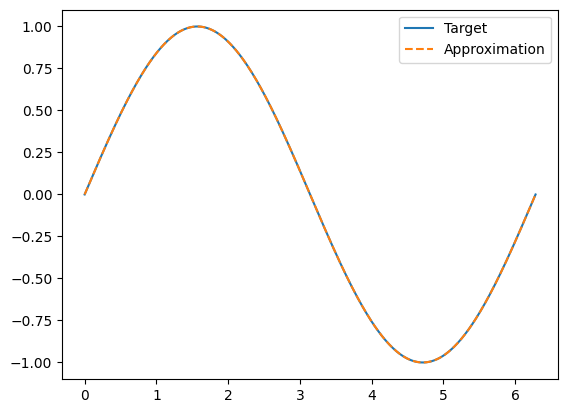

In [76]:
x = symbols('x')

ftarget = sin(x)
K = 50   # A number of approximation terms
x0 = 0  # Anchor point

xs = np.linspace(0, 2*np.pi, 500)
ys = [ftarget.evalf(subs={x:xi}) for xi in xs]

fapprox = taylor_approx(ftarget, K, x0=x0)
yapprxs = [fapprox.evalf(subs={x:xi}) for xi in xs]

plt.plot(xs, ys, label='Target')
plt.plot(xs, yapprxs, '--', label='Approximation')
plt.legend()

# End